<center>
# МОДУЛЬ 3. ПОСТРОЕНИЕ ДЕРЕВЬЕВ РЕШЕНИЙ CART С ПОМОЩЬЮ ПАКЕТА R RPART

# Лекция 3.1 Знакомство с методом CART

## 3.1.1 Описание алгоритма

## 3.1.2 Неоднородность

## 3.1.3 Метод отсечения ветвей на основе меры стоимости-сложности с перекрестной проверкой

## 3.1.4 Обработка пропущенных значений

## 3.1.5 Иллюстрация работы метода CART на конкретных примерах

### 3.1.5.1 Дерево классификации

### 3.1.5.2 Особенности реализации дерева классификации CART в пакете R rpart

In [1]:
# загружаем данные
data <- read.csv2("C:/Trees/CART_classification.csv")

# устанавливаем пакет rpart
# install.packages("rpart")

# загружаем пакет rpart
library(rpart)

# строим модель дерева классификации CART
set.seed(42)
model<-rpart(default~., method='class', data, 
             control=rpart.control(minsplit = 1, minbucket = 1, cp = 0.01))

# выводим краткую информацию
# о модели CART
model

n= 5 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 5 2 Да (0.6000000 0.4000000)  
  2) age>=68.5 2 0 Да (1.0000000 0.0000000) *
  3) age< 68.5 3 1 Нет (0.3333333 0.6666667)  
    6) age< 64.5 1 0 Да (1.0000000 0.0000000) *
    7) age>=64.5 2 0 Нет (0.0000000 1.0000000) *

### 3.1.5.3 Дерево регрессии

### 3.1.5.4 Особенности реализации дерева регрессии CART в пакете R rpart

In [2]:
# загружаем данные
data <- read.csv2("C:/Trees/CART_regression.csv")
str(data)

# строим модель дерева регрессии CART
set.seed(42)
model<-rpart(days_of_delinquency~., method='anova', data, 
             control=rpart.control(minsplit = 1, minbucket = 1, cp = 0.01))

# выводим краткую информацию
# о модели регрессии CART
model

'data.frame':	5 obs. of  3 variables:
 $ age                : int  70 64 69 68 65
 $ gender             : Factor w/ 2 levels "Женский","Мужской": 2 2 1 2 1
 $ days_of_delinquency: int  20 23 12 9 15


n= 5 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 5 130.8 15.8  
   2) age>=64.5 4  66.0 14.0  
     4) age< 69.5 3  18.0 12.0  
       8) age>=66.5 2   4.5 10.5  
        16) age< 68.5 1   0.0  9.0 *
        17) age>=68.5 1   0.0 12.0 *
       9) age< 66.5 1   0.0 15.0 *
     5) age>=69.5 1   0.0 20.0 *
   3) age< 64.5 1   0.0 23.0 *

# Лекция 3.2 Построение и интерпретация дерева классификации CART

## 3.2.1 Подготовка данных

In [3]:
# загружаем данные
data <- read.csv2("C:/Trees/Response.csv")

In [4]:
# смотрим типы переменных
str(data)

'data.frame':	30259 obs. of  14 variables:
 $ mortgage: int  0 1 1 1 1 0 0 1 1 1 ...
 $ life_ins: int  0 1 1 1 1 0 0 1 1 1 ...
 $ cre_card: int  0 0 0 1 0 0 0 0 0 1 ...
 $ deb_card: int  0 1 1 1 1 1 1 1 1 1 ...
 $ mob_bank: int  0 1 0 0 0 1 0 0 0 0 ...
 $ curr_acc: int  0 0 0 1 0 1 0 0 0 1 ...
 $ internet: int  0 0 0 0 0 0 0 0 0 0 ...
 $ perloan : int  0 0 0 0 1 0 0 0 0 0 ...
 $ savings : int  0 0 0 0 0 0 0 0 0 0 ...
 $ atm_user: int  0 1 0 1 1 0 1 1 1 0 ...
 $ markpl  : int  0 0 1 1 0 0 0 0 1 0 ...
 $ age     : int  18 18 18 18 18 18 18 18 18 18 ...
 $ cus_leng: int  1 2 2 2 2 2 1 1 3 2 ...
 $ response: int  0 1 1 1 0 1 1 1 0 1 ...


In [5]:
# преобразовываем переменные в факторы, за исключением 
# переменных с индексами 12 и 13
data[, -c(12:13)] <- lapply(data[, -c(12:13)], factor)

In [6]:
str(data)

'data.frame':	30259 obs. of  14 variables:
 $ mortgage: Factor w/ 2 levels "0","1": 1 2 2 2 2 1 1 2 2 2 ...
 $ life_ins: Factor w/ 2 levels "0","1": 1 2 2 2 2 1 1 2 2 2 ...
 $ cre_card: Factor w/ 2 levels "0","1": 1 1 1 2 1 1 1 1 1 2 ...
 $ deb_card: Factor w/ 2 levels "0","1": 1 2 2 2 2 2 2 2 2 2 ...
 $ mob_bank: Factor w/ 2 levels "0","1": 1 2 1 1 1 2 1 1 1 1 ...
 $ curr_acc: Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 2 ...
 $ internet: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ perloan : Factor w/ 2 levels "0","1": 1 1 1 1 2 1 1 1 1 1 ...
 $ savings : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ atm_user: Factor w/ 2 levels "0","1": 1 2 1 2 2 1 2 2 2 1 ...
 $ markpl  : Factor w/ 2 levels "0","1": 1 1 2 2 1 1 1 1 2 1 ...
 $ age     : int  18 18 18 18 18 18 18 18 18 18 ...
 $ cus_leng: int  1 2 2 2 2 2 1 1 3 2 ...
 $ response: Factor w/ 2 levels "0","1": 1 2 2 2 1 2 2 2 1 2 ...


In [7]:
# задаем стартовое значение генератора случайных чисел, чтобы
# каждый раз получать одно и то же разбиение
# на обучающую и контрольную выборки 
set.seed(100)

# разбиваем набор на обучающую и контрольную выборки
ind <- sample(2,nrow(data),replace=TRUE,prob=c(0.7,0.3))
train <- data[ind==1,]
valid <- data[ind==2,]

In [8]:
# проверяем наличие пропусков в обучающей выборке
print(sapply(train, function(x) sum(is.na(x))))

mortgage life_ins cre_card deb_card mob_bank curr_acc internet  perloan 
       0        0        0        0        0        0        0        0 
 savings atm_user   markpl      age cus_leng response 
       0        0        0        0        0        0 


In [9]:
# проверяем наличие пропусков в контрольной выборке
print(sapply(valid, function(x) sum(is.na(x))))

mortgage life_ins cre_card deb_card mob_bank curr_acc internet  perloan 
       0        0        0        0        0        0        0        0 
 savings atm_user   markpl      age cus_leng response 
       0        0        0        0        0        0 


## 3.2.2 Построение и интерпретация модели классификации

In [10]:
set.seed(42)
# строим модель классификации, уменьшив пороговое 
# значение штрафа за сложность cp
model<-rpart(response~., method='class', control=rpart.control(cp=0.001), 
             data=train)

In [11]:
# выводим информацию о качестве модели
printcp(model)


Classification tree:
rpart(formula = response ~ ., data = train, method = "class", 
    control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age      atm_user cre_card curr_acc cus_leng markpl   mob_bank

Root node error: 9229/21313 = 0.43302

n= 21313 

          CP nsplit rel error  xerror      xstd
1  0.3634197      0   1.00000 1.00000 0.0078380
2  0.0716221      1   0.63658 0.63658 0.0070684
3  0.0393325      3   0.49334 0.49334 0.0064835
4  0.0167949      4   0.45400 0.45400 0.0062867
5  0.0117022      5   0.43721 0.43721 0.0061971
6  0.0018420      6   0.42551 0.42551 0.0061327
7  0.0013002      7   0.42366 0.42670 0.0061394
8  0.0012461      8   0.42236 0.42540 0.0061321
9  0.0010835     10   0.41987 0.42551 0.0061327
10 0.0010000     11   0.41879 0.42616 0.0061363


In [12]:
# выводим подробную информацию о модели
summary(model)

Call:
rpart(formula = response ~ ., data = train, method = "class", 
    control = rpart.control(cp = 0.001))
  n= 21313 

            CP nsplit rel error    xerror        xstd
1  0.363419655      0 1.0000000 1.0000000 0.007838009
2  0.071622061      1 0.6365803 0.6365803 0.007068423
3  0.039332539      3 0.4933362 0.4933362 0.006483491
4  0.016794886      4 0.4540037 0.4540037 0.006286660
5  0.011702243      5 0.4372088 0.4372088 0.006197144
6  0.001842020      6 0.4255066 0.4255066 0.006132723
7  0.001300249      7 0.4236645 0.4266985 0.006139363
8  0.001246072      8 0.4223643 0.4253982 0.006132118
9  0.001083541     10 0.4198721 0.4255066 0.006132723
10 0.001000000     11 0.4187886 0.4261567 0.006136347

Variable importance
cus_leng      age atm_user  savings curr_acc cre_card   markpl mortgage 
      61       25        6        2        1        1        1        1 
internet 
       1 

Node number 1: 21313 observations,    complexity param=0.3634197
  predicted class=0  expected 

In [13]:
# выводим краткую информацию о модели
print(model)


n= 21313 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

  1) root 21313 9229 0 (0.5669779 0.4330221)  
    2) cus_leng>=2.5 6567  179 0 (0.9727425 0.0272575) *
    3) cus_leng< 2.5 14746 5696 1 (0.3862742 0.6137258)  
      6) cus_leng>=1.5 10670 5253 1 (0.4923149 0.5076851)  
       12) atm_user=1 5234 1956 0 (0.6262896 0.3737104)  
         24) curr_acc=1 4423 1473 0 (0.6669681 0.3330319)  
           48) markpl=1 3380 1010 0 (0.7011834 0.2988166) *
           49) markpl=0 1043  463 0 (0.5560882 0.4439118)  
             98) cre_card=1 636  248 0 (0.6100629 0.3899371)  
              196) mob_bank=0 524  187 0 (0.6431298 0.3568702) *
              197) mob_bank=1 112   51 1 (0.4553571 0.5446429) *
             99) cre_card=0 407  192 1 (0.4717445 0.5282555) *
         25) curr_acc=0 811  328 1 (0.4044390 0.5955610)  
           50) markpl=1 357  170 0 (0.5238095 0.4761905)  
            100) age>=29.5 225   98 0 (0.5644444 0.4355556) *
            101) age< 29.

In [14]:
# устанавливаем пакет rattle
# install.packages("rattle")

# загружаем пакет rattle
library(rattle)

Rattle: A free graphical interface for data science with R.
Version 5.1.0 Copyright (c) 2006-2017 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


In [15]:
# выводим непосредственно
# правила разбиения
asRules(model)


 Rule number: 7 [response=1 cover=4076 (19%) prob=0.89]
   cus_leng< 2.5
   cus_leng< 1.5

 Rule number: 27 [response=1 cover=3273 (15%) prob=0.78]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=0
   age< 44.5

 Rule number: 51 [response=1 cover=454 (2%) prob=0.69]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=1
   curr_acc=0
   markpl=0

 Rule number: 53 [response=1 cover=724 (3%) prob=0.57]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=0
   age>=44.5
   cre_card=0

 Rule number: 101 [response=1 cover=132 (1%) prob=0.55]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=1
   curr_acc=0
   markpl=1
   age< 29.5

 Rule number: 197 [response=1 cover=112 (1%) prob=0.54]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=1
   curr_acc=1
   markpl=0
   cre_card=1
   mob_bank=1

 Rule number: 99 [response=1 cover=407 (2%) prob=0.53]
   cus_leng< 2.5
   cus_leng>=1.5
   atm_user=1
   curr_acc=1
   markpl=0
   cre_card=0

 Rule number: 100 [response=0 cover=225 (1%) prob=0.44]
   cus_leng< 2.5
   cus_l

In [16]:
# вычисляем важности переменных
model$variable.importance

cus_leng          age     atm_user      savings     curr_acc     cre_card 
3993.5915311 1619.0428937  368.8030898  101.8555196   94.4689653   87.4262605 
      markpl     mortgage     internet     life_ins     mob_bank     deb_card 
  79.1442601   67.7550491   63.3971021   15.2147548    6.5070892    0.3054504

## 3.2.3 Работа с диаграммой дерева

In [17]:
# устанавливаем пакет rpart.plot
# install.packages("rpart.plot")

# загружаем пакеты rpart.plot
library(rpart.plot)

Warning message:
"package 'rpart.plot' was built under R version 3.4.3"

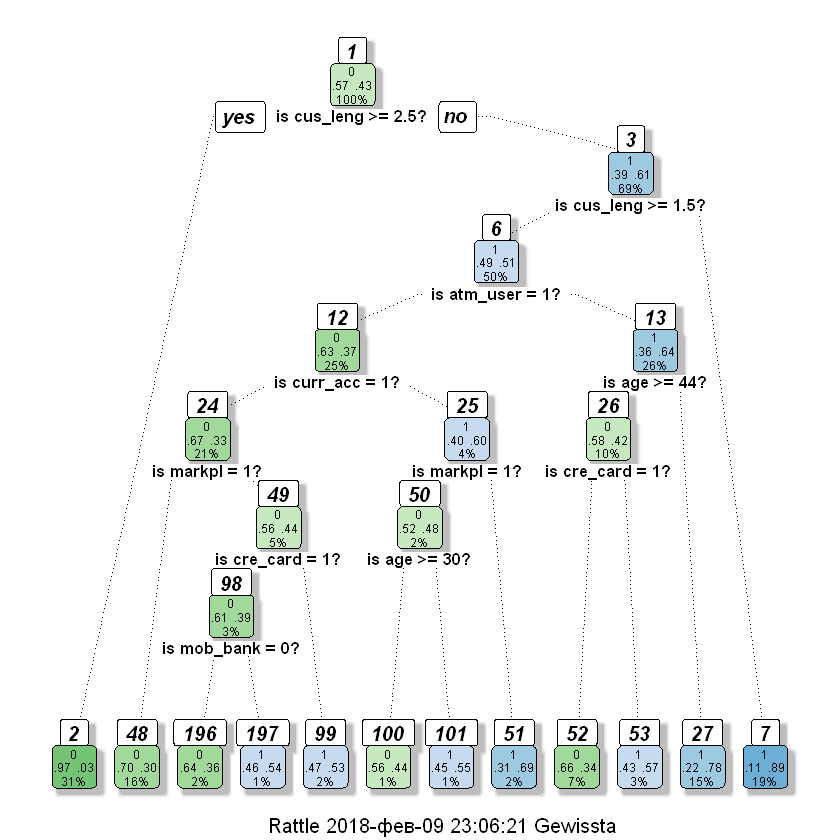

In [18]:
# строим диаграмму дерева, branch задает 
# форму ветвей, space и yspace 
# настраивают горизонтальные и вертикальные 
# размеры боксов, отображающих узлы,
# split.cex настраивает размер 
# шрифта для определений узлов,
# nn.cex задает размер номеров узлов,
# nn.font задает тип шрифта 
# для номеров узлов, 
# split.prefix позволяет вставить 
# текст перед определением узла,
# split.suffix позволяет вставить 
# текст после определения узла
fancyRpartPlot(model,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4,
               split.prefix="is ", 
               split.suffix="?")

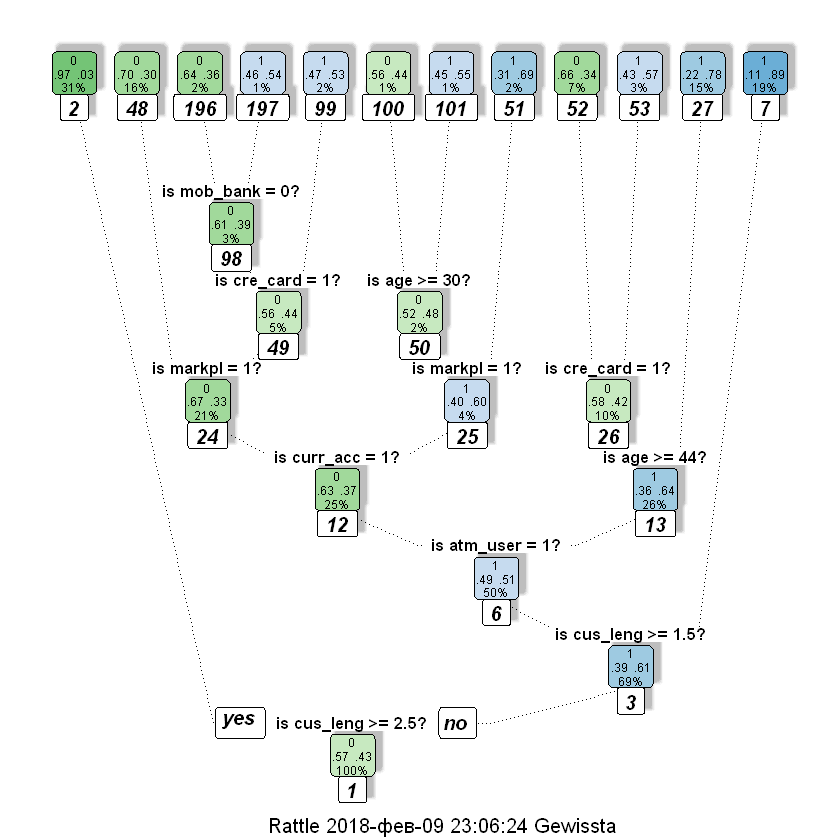

In [19]:
# строим диаграмму дерева снизу вверх,
# использовав значение yflip=TRUE
fancyRpartPlot(model,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4,
               split.prefix="is ", 
               split.suffix="?", yflip=TRUE)

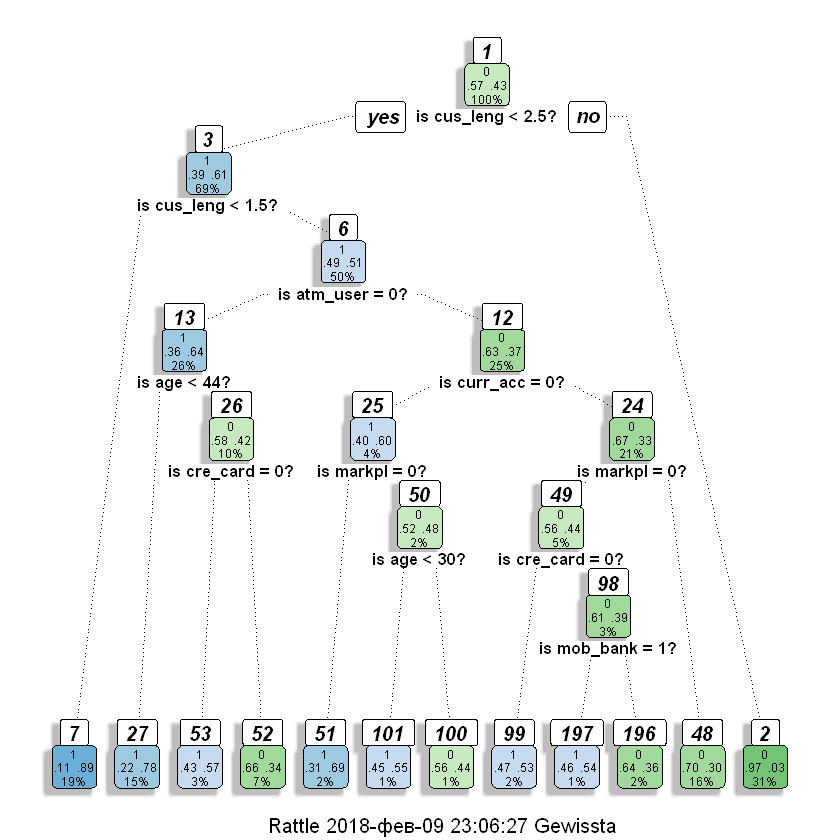

In [20]:
# строим диаграмму дерева, поменяв определения
# узлов на противоположные с помощью
# значения xflip=TRUE
fancyRpartPlot(model,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4,
               split.prefix="is ", 
               split.suffix="?", xflip=TRUE)

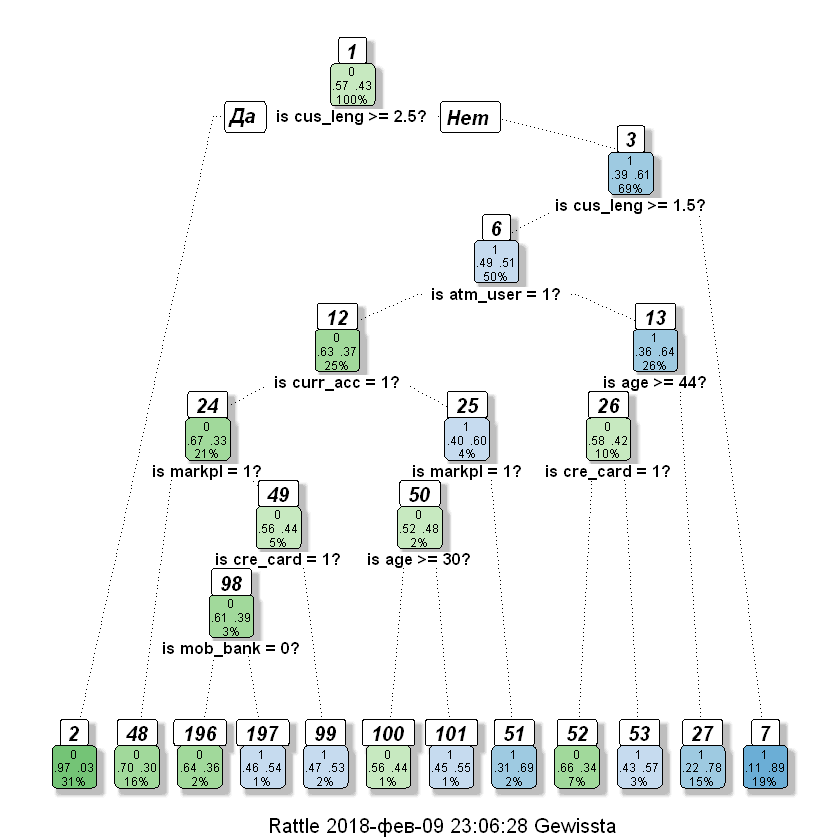

In [21]:
# строим диаграмму дерева, меняя подписи
# yes и no на русские да и нет
fancyRpartPlot(model,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4, split.prefix="is ",
               split.suffix="?", yes.text="Да", no.text="Нет")

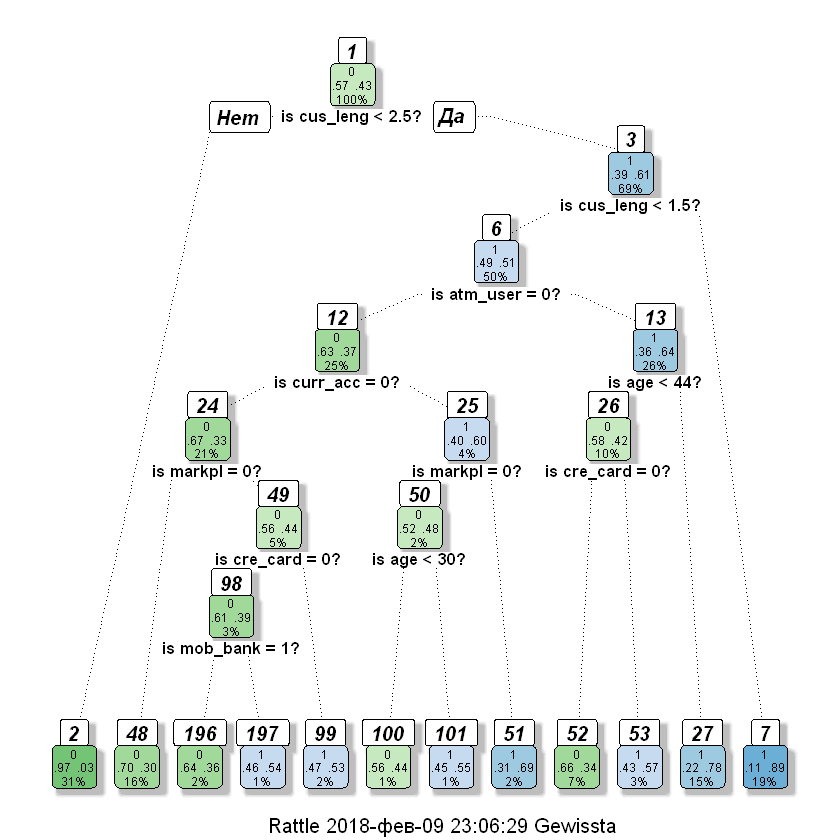

In [22]:
# строим диаграмму дерева, теперь в левую
# часть разбиения будем записывать узел,
# соответствующий отрицательному ответу
# на вопрос
fancyRpartPlot(model,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4, split.prefix="is ",
               split.suffix="?", yes.text="Да", no.text="Нет", left=FALSE)

In [23]:
# устанавливаем пакет partykit
# install.packages("partykit")

# загружаем пакет partykit
library(partykit)

Loading required package: grid


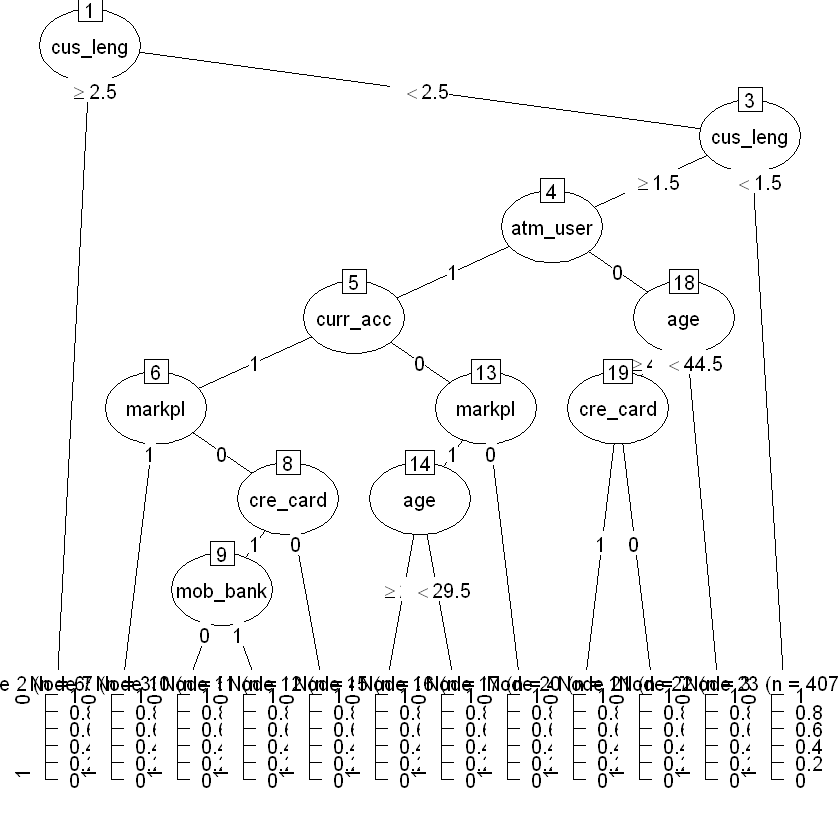

In [24]:
# переводим модель дерева - объект класса 
# rpart в объект класса party
model_party <- as.party(model)

# строим дерево party
plot(model_party)

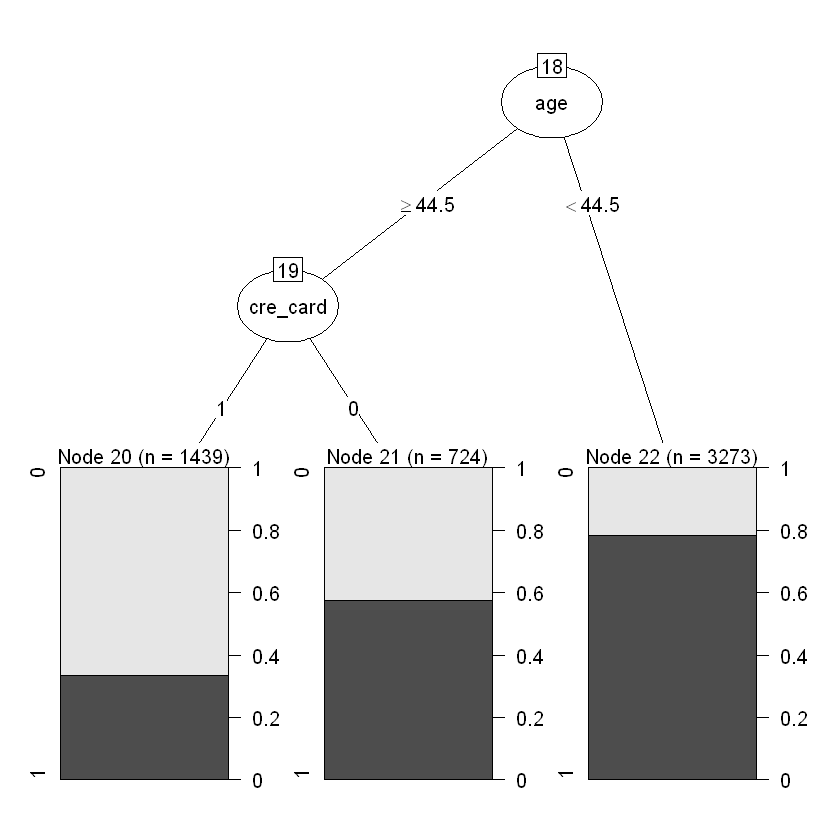

In [25]:
# выводим диаграмму для узла 18
model18 <- model_party[18]
plot(model18)

In [26]:
# выясним, какие наблюдения 
# относятся к узлу 11
node11 <- data_party(model_party, 11)

# выведем первые 5 наблюдений узла 11
head(node11, 5)

,response,mortgage,life_ins,cre_card,deb_card,mob_bank,curr_acc,internet,perloan,savings,atm_user,markpl,age,cus_leng,(fitted),(response)
422,0,1,1,1,1,1,1,0,0,0,1,0,21,2,11,0
893,1,0,1,1,1,1,1,0,0,0,1,0,24,2,11,1
1342,1,1,1,1,1,1,1,0,0,1,1,0,27,2,11,1
2056,1,0,1,1,1,1,1,0,0,0,1,0,28,2,11,1
2216,0,0,1,1,0,1,1,0,0,1,1,0,28,2,11,0


## 3.2.4 Прунинг дерева классификации CART

In [27]:
# выводим информацию о качестве модели
printcp(model)


Classification tree:
rpart(formula = response ~ ., data = train, method = "class", 
    control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] age      atm_user cre_card curr_acc cus_leng markpl   mob_bank

Root node error: 9229/21313 = 0.43302

n= 21313 

          CP nsplit rel error  xerror      xstd
1  0.3634197      0   1.00000 1.00000 0.0078380
2  0.0716221      1   0.63658 0.63658 0.0070684
3  0.0393325      3   0.49334 0.49334 0.0064835
4  0.0167949      4   0.45400 0.45400 0.0062867
5  0.0117022      5   0.43721 0.43721 0.0061971
6  0.0018420      6   0.42551 0.42551 0.0061327
7  0.0013002      7   0.42366 0.42670 0.0061394
8  0.0012461      8   0.42236 0.42540 0.0061321
9  0.0010835     10   0.41987 0.42551 0.0061327
10 0.0010000     11   0.41879 0.42616 0.0061363


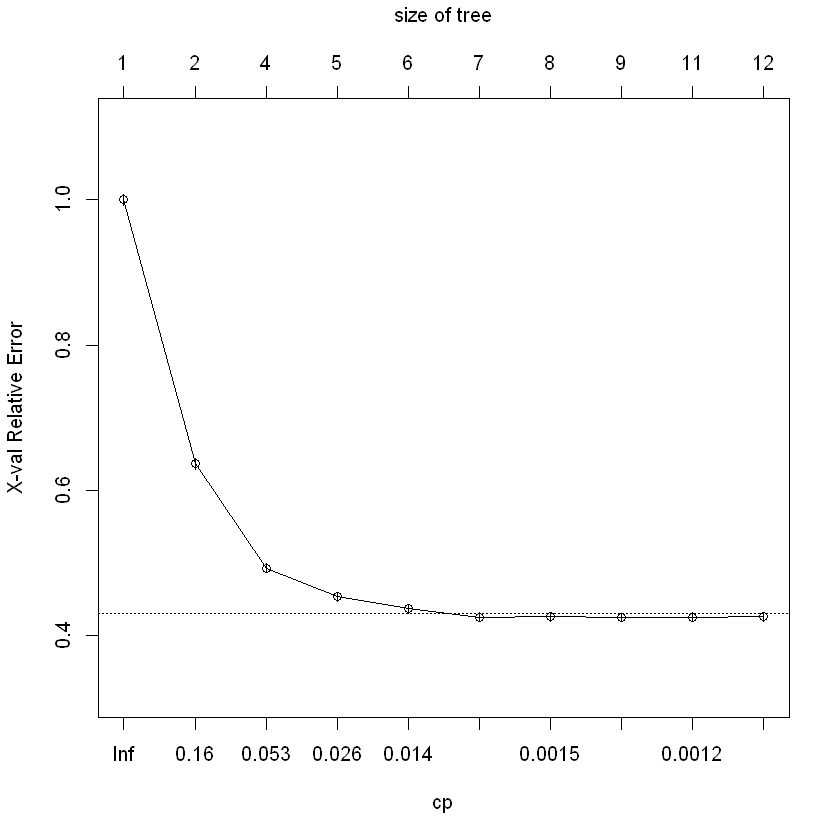

In [28]:
# строим график зависимости кросс-валидационной 
# ошибки от числа расщеплений и сложности модели
plotcp(model)

In [29]:
# строим обрезанное дерево
model2 <- prune(model, cp=0.0015)

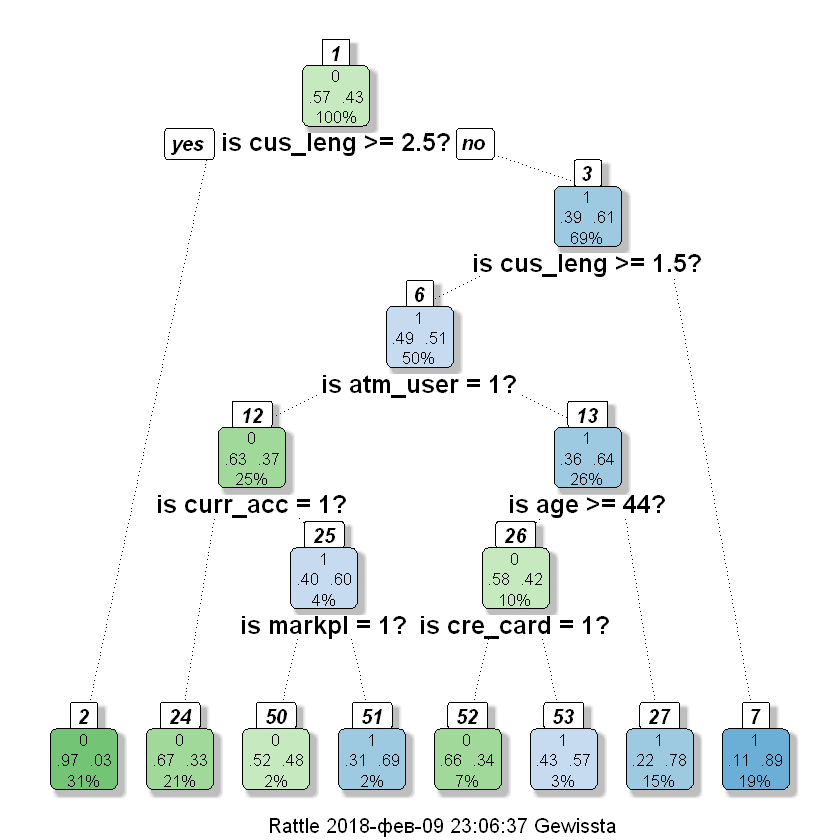

In [30]:
# выводим диаграмму обрезанного дерева
fancyRpartPlot(model2,
               branch=0.5,
               space=0.001, yspace=0.001,
               split.cex=1.5,
               nn.cex=1, nn.font=4,
               split.prefix="is ", 
               split.suffix="?")

In [31]:
# автоматически выбираем оптимальное
# значение cp
model3<- prune(model,cp=model$cptable
               [which.min(model$cptable[,"xerror"]),"CP"])

## 3.2.5 Оценка качества модели

In [32]:
# оцениваем дискриминирующую способность
# обрезанного дерева на контрольной выборке
library(pROC)
prob_valid <- predict(model2, valid, type="prob")
roc_valid <- roc(valid$response, prob_valid[,2], ci=TRUE)

# выводим доверительный интервал AUC
roc_valid

Warning message:
"package 'pROC' was built under R version 3.4.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var




Call:
roc.default(response = valid$response, predictor = prob_valid[,     2], ci = TRUE)

Data: prob_valid[, 2] in 5086 controls (valid$response 0) < 3860 cases (valid$response 1).
Area under the curve: 0.8812
95% CI: 0.8745-0.888 (DeLong)

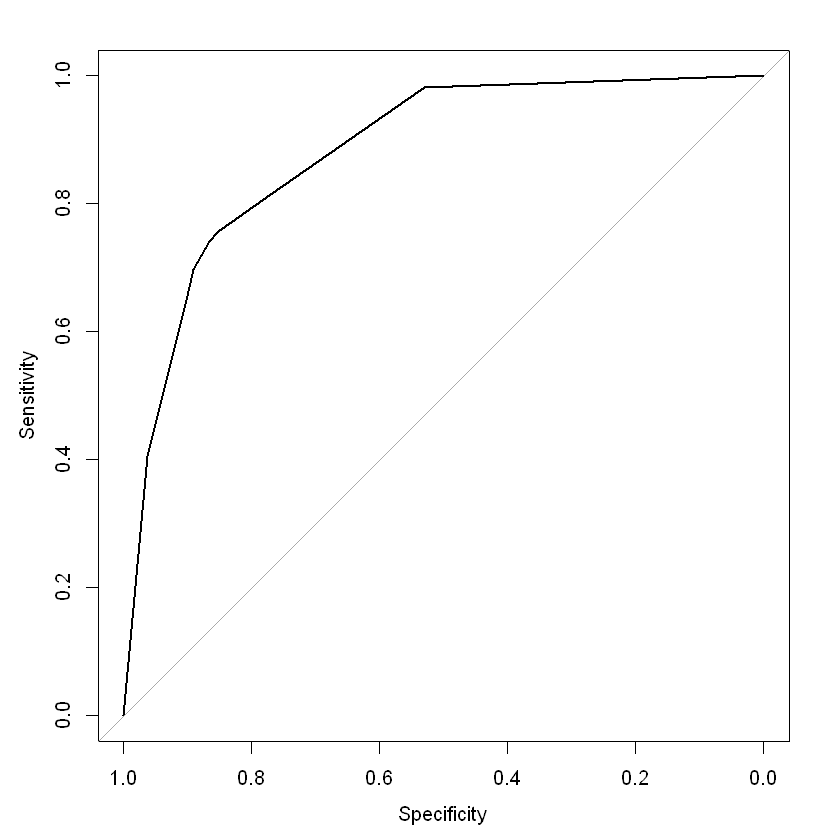

In [33]:
# выводим ROC-кривую
plot.roc(roc_valid)

In [34]:
# устанавливаем пакет ROCR
# install.packages("ROCR")
# загружаем пакет ROCR
library(ROCR)

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



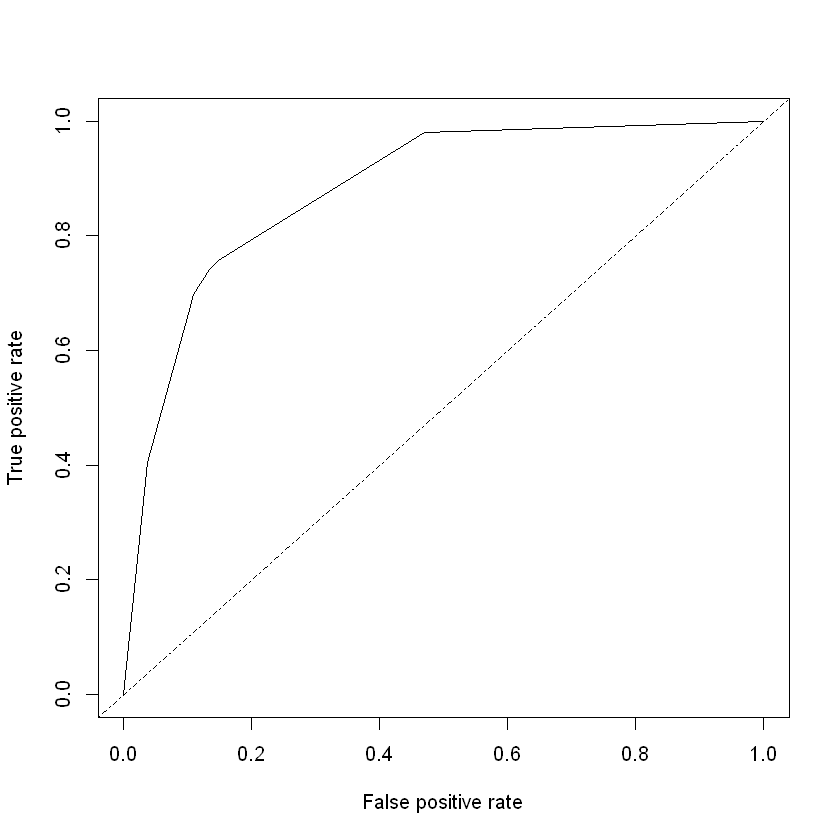

In [35]:
# создаем объект prediction
pred <- prediction(prob_valid[,2], valid$response)

# строим ROC-кривую
plot(performance(pred, "tpr", "fpr"))
abline(0, 1, lty = 4)

In [36]:
# вычисляем AUC
AUC = performance(pred,"auc")@y.values[[1]]
AUC

[1] 0.8812102

In [37]:
# получаем спрогнозированные значения зависимой переменной
# для контрольной выборки
predvalue <- predict(model2, valid, type="class")

# строим матрицу ошибок
table(valid$response, predvalue)

   predvalue
       0    1
  0 4405  681
  1  997 2863

# Лекция 3.3 Построение и интерпретация дерева регрессии CART

## 3.3.1 Подготовка данных

In [38]:
# загружаем данные
data <- read.csv2("C:/Trees/Creddebt.csv")

In [39]:
# смотрим типы переменных
str(data)

'data.frame':	5000 obs. of  7 variables:
 $ age     : int  41 30 40 41 57 45 36 39 43 34 ...
 $ ed      : Factor w/ 5 levels "Высшее, ученая степень",..: 5 3 3 3 3 3 3 3 3 5 ...
 $ employ  : int  17 13 15 15 7 0 1 20 12 7 ...
 $ address : int  12 8 14 14 37 13 3 9 11 12 ...
 $ income  : num  35.9 46.7 61.8 72 25.6 28.1 19.6 80.5 68.7 33.8 ...
 $ debtinc : num  11.9 17.9 10.6 29.7 15.9 ...
 $ creddebt: num  0.5 1.35 3.44 4.17 1.5 0.92 1.21 1.85 1.43 1.42 ...


In [40]:
# порядковую переменную ed преобразовываем
# в упорядоченный фактор
data$ed <- ordered(data$ed, levels = c("Неполное среднее", 
                                       "Среднее", 
                                       "Среднее специальное",   
                                       "Незаконченное высшее", 
                                       "Высшее, ученая степень"))

In [41]:
# смотрим типы переменных
str(data)

'data.frame':	5000 obs. of  7 variables:
 $ age     : int  41 30 40 41 57 45 36 39 43 34 ...
 $ ed      : Ord.factor w/ 5 levels "Неполное среднее"<..: 3 1 1 1 1 1 1 1 1 3 ...
 $ employ  : int  17 13 15 15 7 0 1 20 12 7 ...
 $ address : int  12 8 14 14 37 13 3 9 11 12 ...
 $ income  : num  35.9 46.7 61.8 72 25.6 28.1 19.6 80.5 68.7 33.8 ...
 $ debtinc : num  11.9 17.9 10.6 29.7 15.9 ...
 $ creddebt: num  0.5 1.35 3.44 4.17 1.5 0.92 1.21 1.85 1.43 1.42 ...


In [42]:
# задаем стартовое значение генератора случайных чисел, чтобы
# каждый раз получать одно и то же разбиение
# на обучающую и контрольную выборки 
set.seed(100)

In [43]:
# разбиваем набор на обучающую и контрольную выборки
ind <- sample(2,nrow(data),replace=TRUE,prob=c(0.7,0.3))
tr <- data[ind==1,]
val <- data[ind==2,]

In [44]:
# проверяем наличие пропусков в обучающей выборке
print(sapply(tr, function(x) sum(is.na(x))))

     age       ed   employ  address   income  debtinc creddebt 
       0        0        0        0        0        0        0 


In [45]:
# проверяем наличие пропусков в контрольной выборке
print(sapply(val, function(x) sum(is.na(x))))

     age       ed   employ  address   income  debtinc creddebt 
       0        0        0        0        0        0        0 


## 3.3.2 Построение и интерпретация модели регрессии

In [46]:
set.seed(42)
# строим модель регрессии, уменьшив пороговое 
# значение штрафа за сложность cp
m<-rpart(creddebt~., method='anova', control=rpart.control(cp=0.001), 
         data=tr)

In [47]:
# выводим информацию о качестве модели
printcp(m)


Regression tree:
rpart(formula = creddebt ~ ., data = tr, method = "anova", control = rpart.control(cp = 0.001))

Variables actually used in tree construction:
[1] address debtinc employ  income 

Root node error: 38848/3510 = 11.068

n= 3510 

          CP nsplit rel error  xerror    xstd
1  0.2059577      0   1.00000 1.00077 0.49690
2  0.0848917      1   0.79404 1.05816 0.49800
3  0.0484284      2   0.70915 0.89849 0.43597
4  0.0381777      3   0.66072 0.84844 0.43448
5  0.0223124      4   0.62254 0.81357 0.43444
6  0.0080364      5   0.60023 0.71401 0.36431
7  0.0079322      6   0.59220 0.70344 0.36429
8  0.0063324      7   0.58426 0.70085 0.36429
9  0.0058589      8   0.57793 0.69436 0.36428
10 0.0054694      9   0.57207 0.69082 0.36425
11 0.0050726     10   0.56660 0.69026 0.36425
12 0.0048728     11   0.56153 0.68006 0.36347
13 0.0046986     12   0.55666 0.67790 0.36346
14 0.0037390     13   0.55196 0.67588 0.36339
15 0.0032180     14   0.54822 0.66633 0.36335
16 0.0029638     1

In [48]:
# вычисляем общую сумму квадратов отклонений
TSS <- sum((tr$creddebt-(mean(tr$creddebt)))^2)
TSS

[1] 38847.63

## 3.2.3 Прунинг и оценка качества дерева регрессии CART

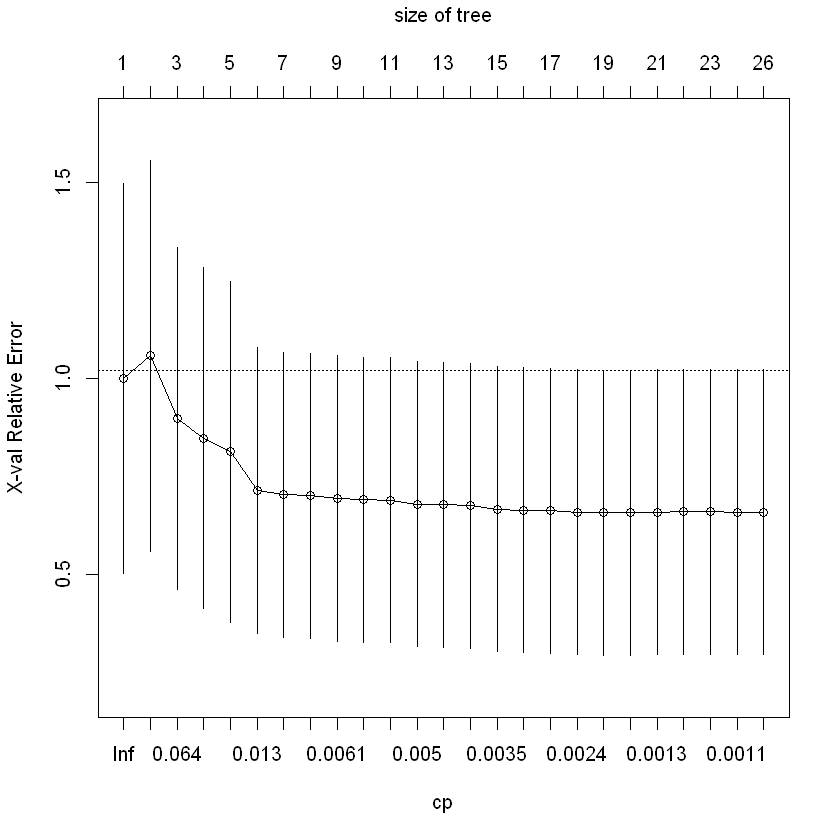

In [49]:
# строим график зависимости кросс-валидационной 
# ошибки от числа расщеплений и сложности модели
plotcp(m)

In [50]:
# находим оптимальное значение cp
cp=m$cptable[which.min(m$cptable[,"xerror"]),"CP"]
cp

[1] 0.001862835

In [51]:
# выполняем прунинг
m2 <- prune(m, cp=0.001862835)

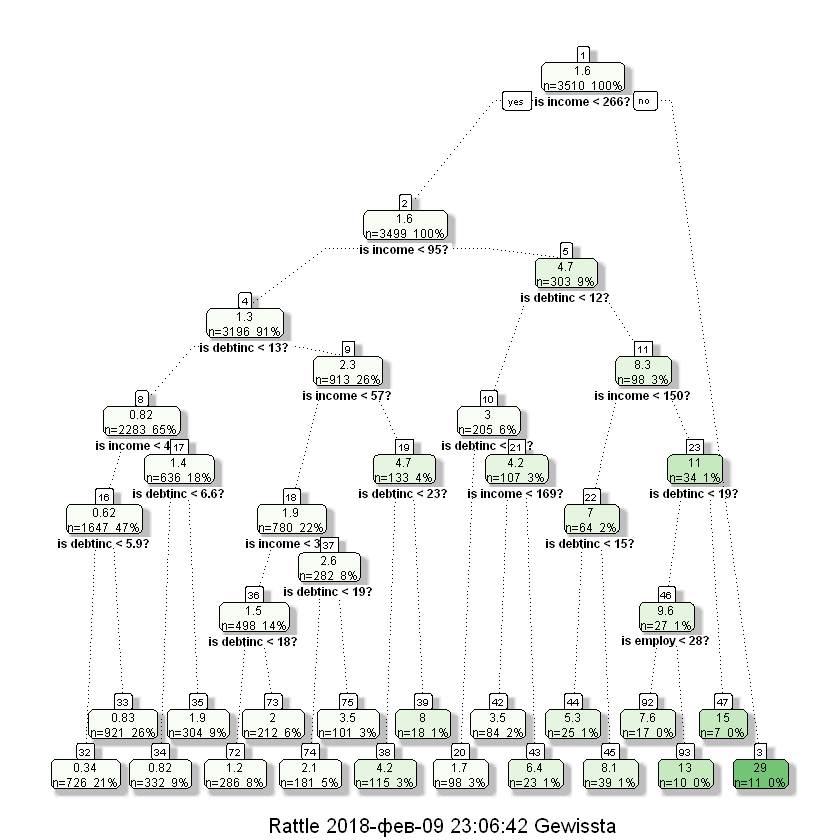

In [52]:
# строим диаграмму обрезанного
# дерева регрессии
fancyRpartPlot(m2,
               branch=0.5,
               space=0.1, yspace=0.01,
               split.cex=1,
               nn.cex=0.5, nn.font=1,
               split.prefix="is ", 
               split.suffix="?")

In [53]:
# вычисляем спрогнозированные значения зависимой 
# переменной на контрольной выборке
predvalue <- predict(m2, val)

In [54]:
# вычисляем девианс или сумму квадратов остатков
# на контрольной выборке, из фактического значения
# зависимой переменной вычитаем спрогнозированное
# значение, возводим остаток в квадрат и квадраты
# остатков суммируем
D <- sum((val$creddebt - predvalue)^2)
D

[1] 6367.12

In [55]:
# вычисляем среднеквадратичную ошибку, сумму квадратов
# делим на количество наблюдений
MSE <- sum((val$creddebt - predvalue)^2)/nrow(val)
MSE

[1] 4.273235

In [56]:
# вычисляем коэффициент детерминации
TSS <- sum((val$creddebt-(mean(val$creddebt)))^2)
RSS <- sum((val$creddebt-predvalue)^2)
R2 <- 1-(RSS/TSS)
R2

[1] 0.1793884

In [57]:
# строим модель линейной регрессии
linearMod <- lm(creddebt ~ ., data=tr)

In [58]:
# получаем спрогнозированные значения
# зависимой переменной с помощью
# модели линейной регрессии
predvalue_regr <-predict(linearMod, val) 

In [59]:
# вычисляем девианс для модели линейной регрессии
D_regr <- sum((val$creddebt - predvalue_regr)^2)
D_regr

[1] 4300.803

In [60]:
# вычисляем среднеквадратичную ошибку 
# для модели линейной регрессии
MSE_regr <- sum((val$creddebt - predvalue_regr)^2)/nrow(val)
MSE_regr

[1] 2.886445

In [61]:
# вычисляем коэффициент детерминации
# для модели линейной регрессии
TSS <- sum((val$creddebt-(mean(val$creddebt)))^2)
RSS <- sum((val$creddebt-predvalue_regr)^2)
R2_regr <- 1-(RSS/TSS)
R2_regr

[1] 0.4457009

In [62]:
# загружаем пакет randomForest для 
# построения случайного леса
library(randomForest)

# строим модель случайного леса
set.seed(42)
forestMod <- randomForest(creddebt ~ ., data=tr)

# получаем спрогнозированные значения
# зависимой переменной с помощью
# модели случайного леса
predvalue_forest <- predict(forestMod, val)

# вычисляем коэффициент детерминации
# для модели случайного леса
TSS <- sum((val$creddebt-(mean(val$creddebt)))^2)
RSS <- sum((val$creddebt-predvalue_forest)^2)
R2 <- 1-(RSS/TSS)
R2

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:rattle':

    importance



[1] 0.6296923